In [1]:
from fastai.vision import *

### Options

In [2]:
defaults.device = torch.device('cpu')

### If you want to create your own dataset from google images

#### Press CTRL + SHIFT + J on windows on google page with images

##### Paste this code to save urls
- urls = Array.from(document.querySelectorAll('.rg_di .rg_meta')).map(el=>JSON.parse(el.textContent).ou);window.open('data:text/csv;charset=utf-8,' + escape(urls.join('\n')));

In [ ]:
classes = ['smile','normal','sad'] #example of classes

folders = ['smile','normal','sad'] #folder names - where save your images
files = ['smile.txt', 'normal.txt', 'sad.txt', 'suprised.txt'] #files with images url

for d, f in zip(folders, files):
    path = Path('dataset')
    dest = path/d
    dest.mkdir(parents=True, exist_ok=True)
    download_images(path/f, dest, max_pics=200)

### Verify images

In [ ]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

### If you have your own dataset

In [3]:
path = Path('dataset')

### Image processing (train and validation split, batch size, image transforms, normalization)

In [7]:
np.random.seed(32)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2, 
                                  ds_tfms=get_transforms(), size=224, num_workers=4, bs = 24).normalize(imagenet_stats)

In [ ]:
data.show_batch(rows=3, figsize=(7,8))

### Learning - using pretrained resnet34 model

In [12]:
learn = cnn_learner(data, models.resnet34, metrics=[error_rate, accuracy])

In [11]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.309468,1.092508,0.526316,0.473684,04:24
1,0.941258,1.236163,0.447368,0.552632,03:34
2,0.760267,1.183768,0.421053,0.578947,03:53
3,0.644474,1.048734,0.447368,0.552632,03:10


### Save, load and export model

In [38]:
learn.save('stage-x')

In [ ]:
learn.load('stage-x')

In [39]:
learn.export('export.pkl')

### Attempting to gain better accuracy

In [35]:
learn.unfreeze()
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


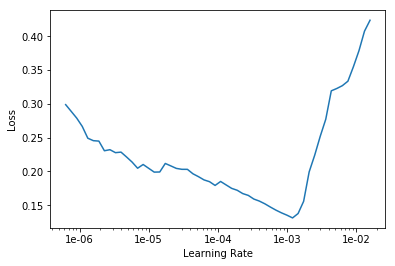

In [36]:
learn.recorder.plot()

In [37]:
learn.fit_one_cycle(3, max_lr=slice(1e-065,3e-03))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.227185,0.312414,0.148148,0.851852,03:09
1,0.178494,0.219038,0.111111,0.888889,02:34
2,0.207188,0.199293,0.074074,0.925926,02:47


### Results interpretation

In [40]:
interp = ClassificationInterpretation.from_learner(learn)

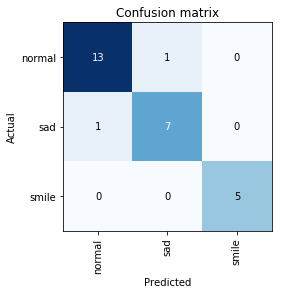

In [41]:
interp.plot_confusion_matrix()